<a href="https://colab.research.google.com/github/hsrpedro006/Collab-/blob/codigos/Checkpoint_Alcides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alunos
* Renata Klein do Amaral | RM558163 | (Representante)
* Victor Novaes Gonçalves | RM558011
* Pedro Henrique de Souza Rodrigues | RM556104
* Julia Silva de Oliveira | RM558921

# Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! sudo pip install unidecode

from wordcloud import WordCloud
import re
from unicodedata import normalize
import unidecode
import string
from spacy.lang.pt.stop_words import STOP_WORDS

# Verificação dos dados

In [ ]:
df = pd.read_csv('dados_atendimentos.csv')
df.isnull().sum() # Verificando se há dados nulos

,0
idEntrada,0
state,0
usuarioOnline,0
statusSaida,0
paginaSaida,0
avaliacao,0
dataHoraEntrada,0
dataHoraSaida,0
dataHoraErro,0
tempoAcesso,0


In [ ]:
df1 = pd.read_csv('dados_renda_municipios_2010.csv')
df1.isnull().sum() #Verificando se há dados nulos

,0
state,0
city,0
RDPC,0


In [ ]:
df['usuarioOnline'].unique()
# Verificação de status do usuário (online, offline)

array([1, 0])

# Número de atendimentos

In [ ]:
atendimentos = df['usuarioOnline']
atendimentos.value_counts() #Verificação do número de atendimentos

,count
usuarioOnline,
0,746
1,254


# Quantidade de avaliações

In [ ]:
df['avaliacao'].unique()
# Quantidade de avaliações no dataframe

array(['positiva', 'negativa', 'n/ avaliado'], dtype=object)

In [ ]:
avaliação = df['avaliacao']
avaliação.value_counts()
# Quantidade de cada avaliação presente no dataframe

,count
avaliacao,
negativa,510
positiva,251
n/ avaliado,239


# Tipos de erros

In [ ]:
df['codigo'].unique()
# Tipo de Erros

array([550, 500])

In [ ]:
erro = df['codigo']
erro.value_counts()
# Contagem dos erros

,count
codigo,
550,533
500,467


# Tempo de acesso

In [ ]:
tempo_acesso = df['tempoAcesso']
tempo_acesso.describe()
# Análise descritiva da variável "tempo_acesso"

,tempoAcesso
count,1000.000000
mean,246.371000
std,112.761565
min,1.000000
25%,171.000000
50%,241.000000
75%,320.000000
max,629.000000


# Tempo de acesso por atendimento

In [ ]:
df_agrupado = df.groupby('usuarioOnline')['tempoAcesso']
df_agrupado.describe()
# Descrição do tempo de acesso

,count,mean,std,min,25%,50%,75%,max
usuarioOnline,,,,,,,,
0,746.0,244.640751,111.327823,1.0,169.25,240.0,316.00,563.0
1,254.0,251.452756,116.947658,7.0,173.00,245.5,335.75,629.0


# Tempo de acesso por avaliação

In [ ]:
df_agrupado1 = df.groupby('avaliacao')['tempoAcesso']
df_agrupado1.describe()
# Descrição do tempo de acesso por avaliação

,count,mean,std,min,25%,50%,75%,max
avaliacao,,,,,,,,
n/ avaliado,239.0,238.472803,115.949525,1.0,158.5,234.0,309.50,629.0
negativa,510.0,246.870588,113.674072,4.0,168.0,243.5,330.75,549.0
positiva,251.0,252.876494,107.700718,7.0,189.0,251.0,308.00,562.0


# Tempo de acesso por código de erro

In [ ]:
df_agrupado2 = df.groupby('codigo')['tempoAcesso']
df_agrupado2.describe()
# Descrição do tempo de acesso por código de erro

,count,mean,std,min,25%,50%,75%,max
codigo,,,,,,,,
500,467.0,245.173448,109.053762,4.0,173.0,237.0,319.5,629.0
550,533.0,247.420263,116.004844,1.0,169.0,246.0,321.0,563.0


# Coluna de palavras

In [ ]:
texto_completo = ' '.join(df['erro'])
# Combinando as linhas em texto inteiro

In [ ]:
 wc = WordCloud()
 wc.generate(texto_completo)
 # Gerando uma núvem de palavras

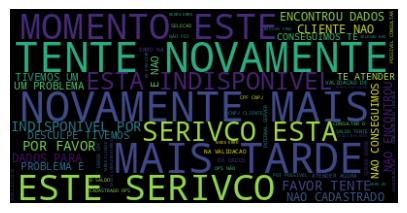

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
# Gerando a imagem

In [ ]:
texto_completo1 = ' '.join(df['erro'] + ' ' + df['avaliacao'])  # Combinando as linhas em texto inteiro
wc.generate(texto_completo1)  # Gerando uma núvem de palavras

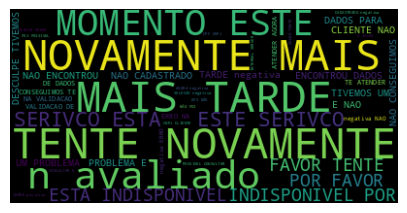

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
# Gerando a imagem

# Indice de Gini

In [ ]:
# Função de Gini fornecida
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [ ]:
# Aplicação da função substituindo a coluna RDPC
df_gini_estado = df1.groupby('state')['RDPC'].apply(lambda x: gini(x.values)).reset_index()
df_gini_estado = df_gini_estado.rename(columns = {'RDPC':'gini'})

In [ ]:
# Agrupando tabelas
tabela_agrupada = df_gini_estado.merge(df)

In [ ]:
# Visualização dos tipos dos dados
df.dtypes

,0
idEntrada,int64
state,object
usuarioOnline,int64
statusSaida,object
paginaSaida,int64
avaliacao,object
dataHoraEntrada,object
dataHoraSaida,object
dataHoraErro,object
tempoAcesso,int64


In [ ]:
df_gini_estado.dtypes

,0
state,object
gini,float64


In [ ]:
avaliação_por_gini = tabela_agrupada[['gini','avaliacao', 'state']]
# Agrupamento de colunas

In [ ]:
avaliação_por_gini.describe()
# Descrição das colunas agrupadas

,gini
count,1000.000000
mean,0.158188
std,0.027156
min,0.127922
25%,0.138104
50%,0.149203
75%,0.173719
max,0.241690


In [ ]:
analise = avaliação_por_gini[avaliação_por_gini['gini'] < 0.138104] # Nomeando variável quando gini for menor que o primeiro quartil
analise['avaliacao'].describe() # Descrevendo da avaliação em estados onde o índice gini é menor que o primeiro quartil

,avaliacao
count,236
unique,3
top,negativa
freq,120


In [ ]:
analise[analise['avaliacao'] == 'n/ avaliado'].describe() # Verificando o total de não avaliações

,gini
count,55.000000
mean,0.132868
std,0.003169
min,0.127922
25%,0.131235
50%,0.132551
75%,0.134532
max,0.137464


In [ ]:
analise['state'].unique()
# Conferindo os estados abaixo do primeiro quartil

array(['CE', 'MS', 'PB', 'PR', 'RO', 'SC'], dtype=object)

In [ ]:
analise1 = avaliação_por_gini[avaliação_por_gini['gini'] < 0.173719] # Nomeando variável quando gini for menor que o terceiro quartil

In [ ]:
analise1['state'].unique() # Conferindo os estados abaixo do terceiro quartil

array(['AL', 'BA', 'CE', 'ES', 'GO', 'MS', 'MT', 'PB', 'PE', 'PI', 'PR',
       'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [ ]:
analise1['avaliacao'].describe()  # Descrevendo da avaliação em estados onde o índice gini é menor que o terceiro quartil

,avaliacao
count,751
unique,3
top,negativa
freq,376


In [ ]:
analise1[analise1['avaliacao'] == 'n/ avaliado'].describe() # Verificando o total de não avaliações

,gini
count,186.000000
mean,0.145273
std,0.011946
min,0.127922
25%,0.137464
50%,0.140823
75%,0.153020
max,0.173719


# Avaliações


* Valor baixo (próximo de 0): Indica que há pouca desigualdade na distribuição dos dados analisados. Por exemplo, se fosse aplicado ao acesso aos serviços, um índice próximo de 0 sugeriria que todos têm acesso de forma relativamente igualitária.
* Valor alto (próximo de 1): Sugere uma alta concentração, onde poucos indivíduos ou grupos têm a maior parte dos recursos ou atendimentos.
Aplicação Contextual:

* Dependendo da variável analisada, o Índice de Gini pode revelar desigualdades estruturais, áreas com maiores desafios de acesso, ou segmentos que necessitam de intervenção para uma distribuição mais equitativa.

* A análise do Índice de Gini fornece uma visão clara sobre a desigualdade presente nos dados. Se o seu contexto é a distribuição de recursos, atendimento ou outro fator similar, um valor de Gini mais alto indicaria uma área que pode exigir mais atenção para garantir uma distribuição mais equitativa.



# Conclusão

* Mediante a verificação dos dados, foi possível verificar o índice de gini é maior nas regiões Norte e Nordeste, apresentando um índice de renda per capita mais uniforme.
* A região que apresenta um índice quase 0, é a região Sul, tendo SC e PR como principais estados mais iguais em renda.
* Os estados como SP e RJ, nos mostram que a distribuição da renda é muito discrepante, muito dinheiro concentrado em uma determinada classe.